In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow.keras.applications as apps

from utility.wavelet_coder import HaarCoder
from utility.classifying_tools import classify_images_n_icons_from_folder, MODEL, PRE_INP, DEC_PRED, SHAPE, get_short_comparison
from utility.loader import load_image

## Models

In [2]:
# Trained image classifiers: https://keras.io/api/applications/

classifiers = {}

classifiers['MobileNetV2'] = {MODEL: apps.mobilenet_v2.MobileNetV2(weights='imagenet'),
                         PRE_INP: apps.mobilenet_v2.preprocess_input,
                         DEC_PRED: apps.mobilenet_v2.decode_predictions,
                         SHAPE: (224, 224)}

classifiers['VGG16'] = {MODEL: apps.vgg16.VGG16(weights='imagenet'),
                         PRE_INP: apps.vgg16.preprocess_input,
                         DEC_PRED: apps.vgg16.decode_predictions,
                         SHAPE: (224, 224)}

classifiers['VGG19'] = {MODEL: apps.vgg19.VGG19(weights='imagenet'),
                         PRE_INP: apps.vgg19.preprocess_input,
                         DEC_PRED: apps.vgg19.decode_predictions,
                         SHAPE: (224, 224)}

classifiers['ResNet50'] = {MODEL: apps.resnet50.ResNet50(weights='imagenet'),
                         PRE_INP: apps.resnet50.preprocess_input,
                         DEC_PRED: apps.resnet50.decode_predictions,
                         SHAPE: (224, 224)}

classifiers['NASNetMobile'] = {MODEL: apps.nasnet.NASNetMobile(weights='imagenet'),
                         PRE_INP: apps.nasnet.preprocess_input,
                         DEC_PRED: apps.nasnet.decode_predictions,
                         SHAPE: (224, 224)}

classifiers['NASNetLarge'] = {MODEL: apps.nasnet.NASNetLarge(weights='imagenet'),
                         PRE_INP: apps.nasnet.preprocess_input,
                         DEC_PRED: apps.nasnet.decode_predictions,
                         SHAPE: (331, 331)}

## Data

In [3]:
path = r'C:\Users\Todmount\MyDrive\MyLearning\Uni\MastersThesis\WCLC\data\orig'
list_dir = os.listdir(path)
print('Number of images:', len(list_dir))

Number of images: 130


(<matplotlib.image.AxesImage at 0x23123abc4d0>,
 Text(0.5, 1.0, 'pp_30.jpg, shape: (6117, 9176, 3)'))

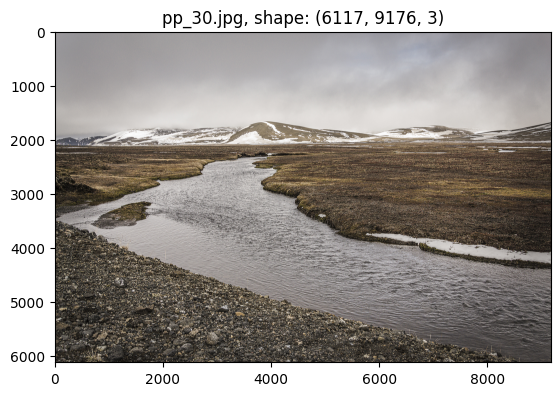

In [4]:
# Sample
index = 77

name = list_dir[index]
# sample = load_image(f'{drive_path}/{name}')
sample = load_image(f'{path}/{name}')

plt.imshow(sample), plt.title(f'{name}, shape: {sample.shape}')

## Analysis

In [ ]:
coder = HaarCoder()
depth = 5
top = 5

# type of interpolation used in resizing
interpolation = cv2.INTER_AREA

results = dict()

for name, classifier in classifiers.items():
  res = classify_images_n_icons_from_folder(classifier, path, coder, depth, top, interpolation)

  res_df = get_short_comparison(res, top)

  res_df.to_csv(f'{name}.csv')

  sum_df = res_df.describe()
  sum_df.to_csv(f'{name}-summary.csv')

  results[name] = sum_df

1/1 [==============================] - 0s 56ms/step


### MobileNetV2

In [12]:
results['MobileNetV2']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.046154,80.923077,0.761538
std,0.745649,14.912986,0.427791
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,4.000000,80.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### VGG16

In [13]:
results['VGG16']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.507692,90.153846,0.815385
std,0.649939,12.998784,0.389486
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,5.000000,100.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### VGG19

In [14]:
results['VGG19']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.584615,91.692308,0.876923
std,0.581159,11.623183,0.329796
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,5.000000,100.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### ResNet50

In [15]:
results['ResNet50']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.323077,86.461538,0.861538
std,0.706727,14.134544,0.346720
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,4.000000,80.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### NASNetMobile

In [16]:
results['NASNetMobile']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.392308,87.846154,0.892308
std,0.687611,13.752216,0.311191
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,4.500000,90.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### NASNetLarge

In [17]:
results['NASNetLarge']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.238462,84.769231,0.846154
std,0.814632,16.292643,0.362197
min,1.000000,20.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,4.000000,80.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### Compare classifiers

In [18]:
names = []
mean_sim_clas_perc = []
mean_sim_best_clas = []

for name, df in results.items():
  names.append(name)
  mean_sim_clas_perc.append(df.iat[1, 1])
  mean_sim_best_clas.append(df.iat[1, 2] * 100)

### Similar classes

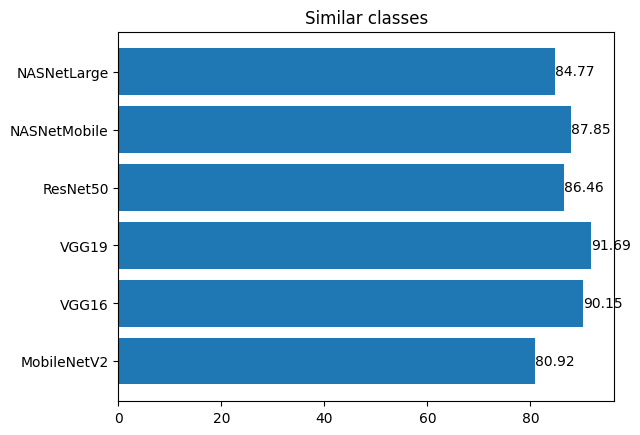

In [19]:
args = list(range(len(names)))

plt.barh(args, mean_sim_clas_perc)

for i, value in enumerate(mean_sim_clas_perc):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center')

plt.yticks(args, labels=names)
plt.title('Similar classes')
plt.show()

### The best class similarity

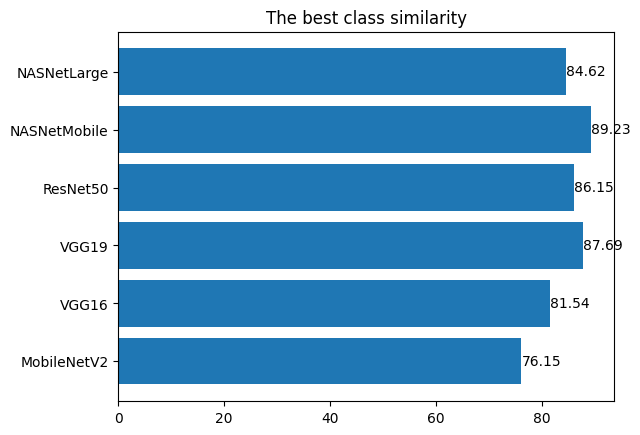

In [20]:
args = list(range(len(names)))

plt.barh(args, mean_sim_best_clas)

for i, value in enumerate(mean_sim_best_clas):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center')

plt.yticks(args, labels=names)
plt.title('The best class similarity')
plt.show()

## Conclusions

On average, each model:

* Produces the same best prediction class for at least 80% of cases for both source and icon images.
* Provides predictions that coincide between the source and icon images in at least 80.88% of cases.

So, in some applications, when operating large digital photos, it makes sense to apply classifier to **icon**.

REMARK. In this demo, the Haar wavelet is used. Its approximation properties are not the best. In other words, there exists better wavelet systems, and these systems might produce better icon. So, the percentage might be higher. The FraCLICWa framework and its extension can be useful in the research.